<a href="https://colab.research.google.com/github/sohamhmhm/CodeClauseint/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THIS IS THE FIRST PROJECT - #CC69844 CREDIT CARD FRAUD DETECTION

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
card_data = pd.read_csv('/content/creditcard.csv')

In [14]:
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [11]:
#Finding missing values
card_data.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [15]:
card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [16]:
# separating the data for analysis
legit = card_data[card_data.Class == 0]
fraud = card_data[card_data.Class == 1]

In [17]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [20]:
#Statistical measures of Fraud
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [21]:
card_data.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
legit_samp = legit.sample(n=492)

In [23]:
new_creddataset = pd.concat([legit_samp, fraud], axis=0)

In [24]:
new_creddataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
100107,67417.0,-0.782103,-0.365733,3.225559,-1.542139,-1.024564,0.963944,-0.736228,0.456805,0.108792,...,0.163323,0.997752,-0.422698,0.061784,0.406158,-0.126637,0.192357,-0.107455,2.00,0
187206,127438.0,-0.344628,-0.422161,0.658635,-0.456198,0.061444,0.731014,-0.148453,0.189395,-0.895654,...,0.040447,0.719304,-0.084491,0.201412,-0.559945,-0.600478,0.181539,0.057458,111.10,0
252226,155711.0,2.117905,-0.092890,-1.603938,-0.027178,0.632961,-0.092798,0.090293,-0.132676,0.288733,...,-0.321453,-0.791026,0.152574,-1.370290,-0.126163,0.261476,-0.072418,-0.082911,0.89,0
280622,169647.0,1.990033,-0.162545,-3.247394,-0.573536,2.687981,3.001290,-0.340003,0.717338,0.432682,...,0.204028,0.582354,-0.006629,0.629369,0.279351,-0.083388,0.012672,-0.030708,30.99,0
60959,49581.0,0.656015,-1.903999,0.827023,-0.319202,-1.510240,1.017050,-1.026984,0.427928,-0.094830,...,0.278480,0.338167,-0.192767,-0.255802,0.083843,-0.231223,0.026116,0.057196,296.78,0


In [25]:
new_creddataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [26]:
new_creddataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92775.861789,-0.082085,-0.052854,0.017352,-0.069080,-0.067864,-0.079102,0.049389,0.028935,0.009265,...,0.060058,0.037422,0.020561,0.004776,-0.029394,-0.025216,-0.009488,0.020361,0.014494,111.285955
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [27]:
X = new_creddataset.drop(columns='Class', axis=1)
Y = new_creddataset['Class']

In [28]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
100107   67417.0 -0.782103 -0.365733  3.225559 -1.542139 -1.024564  0.963944   
187206  127438.0 -0.344628 -0.422161  0.658635 -0.456198  0.061444  0.731014   
252226  155711.0  2.117905 -0.092890 -1.603938 -0.027178  0.632961 -0.092798   
280622  169647.0  1.990033 -0.162545 -3.247394 -0.573536  2.687981  3.001290   
60959    49581.0  0.656015 -1.903999  0.827023 -0.319202 -1.510240  1.017050   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [29]:
print(Y)

100107    0
187206    0
252226    0
280622    0
60959     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [32]:
model = LogisticRegression()

In [35]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [36]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [37]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9453621346886912


In [38]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [39]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.934010152284264


<bound method Axes.set of <Axes: xlabel='None'>>

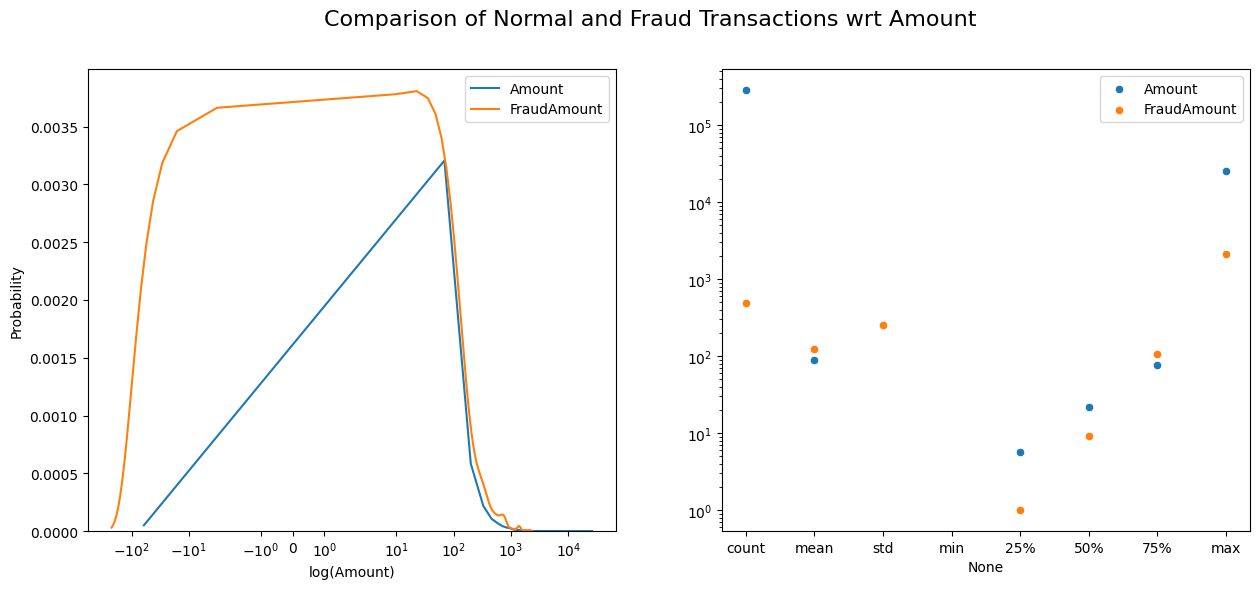

In [42]:
card_data['Amount'] = card_data['Amount'].replace([np.inf, -np.inf], np.nan)

# Optionally, drop rows where 'Amount' is NaN
card_data = card_data.dropna(subset=['Amount'])

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Comparison of Normal and Fraud Transactions wrt Amount', fontsize=16)

# KDE plot
sns.kdeplot(card_data[card_data['Class'] == 0]['Amount'], label='Amount', ax=ax[0])
sns.kdeplot(card_data[card_data['Class'] == 1]['Amount'], label='FraudAmount', ax=ax[0])
ax[0].set_xscale('symlog')
ax[0].set_xlabel('log(Amount)')
ax[0].set_ylabel('Probability')
ax[0].legend()  # Ensure the legend is added to the first plot

# Scatter plot of summary statistics
stats_normal = card_data[card_data['Class'] == 0]['Amount'].describe()
stats_fraud = card_data[card_data['Class'] == 1]['Amount'].describe()

sns.scatterplot(x=stats_normal.index, y=stats_normal.values, label='Amount', ax=ax[1])
sns.scatterplot(x=stats_fraud.index, y=stats_fraud.values, label='FraudAmount', ax=ax[1])

ax[1].set_yscale('log')
ax[1].set